In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.unicode.east_asian_width', True)

import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

from sklearn.model_selection import train_test_split

## 단순 선형 회귀 모델 - Tensorflow with keras 사용
### 0. 데이터 준비

In [3]:
# 공부 시간
X = np.array([1,2,3,4,5,6,7,8,9])

# 공부 시간에 따른 점수
y = np.array([11,22,33,44,53,66,77,87,95])

### 1. 모델링(Modeling) - 모델 생성 단계

In [4]:
# Keras Sequential model
#
# Sequential() 객체 생성 - 인공 신경망( Artificial Neural Network ) 모델
model = Sequential() 

# Dense 객체 생성 후 Sequential 객체에 추가(은닉층 생성)
# Dense 객체 생성시 첫번째 인수 : 뉴런 수(은닉층의 뉴런 수)
# input_dim = 1 : 입력 뉴런 수(입력 차원)
# activation = 'linear' : 활성화 함수
#      linear : 선형회귀, defalut
#     sigmoid : 이진분류
#     softmax : 다중클래스 분류
#        relu : 은닉층에서 많이 사용
model.add(Dense(1, input_dim = 1, activation='linear'))

In [5]:
model.summary() # 생성된 모델의 구조 확인

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### 2. 컴파일(Compile) 단계

In [6]:
# 옵티마이저 설정, SGD : 확률적 경사 하강법, lr : 학습률
sgd  = optimizers.SGD(lr = 0.01)

# optimizer = sgd: 훈련 과정에서 사용할 최적화 함수
# loss = 'mean_squared_error' : 훈련 과정에서 사용할 손실 함수
# metrics = ['mse','accuracy'] : 훈련 모니터링 지표
model.compile(optimizer = sgd, loss = 'mean_squared_error',
              metrics = ['mse', 'accuracy'])

### 3. 훈련(Training) 단계

In [7]:
# 첫 번째 인수 : 훈련 입력 데이터
# 두 번째 인수 : 훈련 정답 데이터
# batch_size = 1 : 배치 크기, default - 32
#                   미니배치 경사 하강법 사용을 안할 경우 None
# epochs = 300 : 에포크, 전체 데이터를 한 차례 훈련한다는 의미, 훈련 횟수
# validation_data( x_val, y_val) : 검증 데이터 사용시 인수
# validation_split = 정수 : validation_data를 대신하여 사용
# verbose : 훈련 중 출력 문구
#           0 - 아무것도 출력하지 않음
#           1 - 훈련 진행도를 보여주는 진행 막대 표시(default)
#           2 - 미니 배치마다 손실 정보 출력
# fit() 메서드 return 값 : 훈련시의 metrics 내용을 dict 형태로 반환
history = model.fit(X, y, batch_size= 1, epochs= 300)

Epoch 1/300
9/9 [==============================] - 0s 2ms/step - loss: 525.8915 - mse: 525.8915 - accuracy: 0.0000e+00
Epoch 2/300
9/9 [==============================] - 0s 2ms/step - loss: 1.3711 - mse: 1.3711 - accuracy: 0.0000e+00
Epoch 3/300
9/9 [==============================] - 0s 2ms/step - loss: 3.6843 - mse: 3.6843 - accuracy: 0.0000e+00
Epoch 4/300
9/9 [==============================] - 0s 1ms/step - loss: 1.0673 - mse: 1.0673 - accuracy: 0.0000e+00
Epoch 5/300
9/9 [==============================] - 0s 2ms/step - loss: 2.0752 - mse: 2.0752 - accuracy: 0.0000e+00
Epoch 6/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1736 - mse: 2.1736 - accuracy: 0.0000e+00
Epoch 7/300
9/9 [==============================] - 0s 2ms/step - loss: 2.2989 - mse: 2.2989 - accuracy: 0.0000e+00
Epoch 8/300
9/9 [==============================] - 0s 1ms/step - loss: 5.2110 - mse: 5.2110 - accuracy: 0.0000e+00
Epoch 9/300
9/9 [==============================] - 0s 2ms/step - loss: 2.584

### 4. 평가(Evaluation)

In [8]:
# 첫 번째 인수 : 테스트 입력 데이터
# 두 번째 인수 : 테스트 정답 데이터
# batch_size = 1 : 배치 크기
model.evaluate(X, y, batch_size= 1)

9/9 [==============================] - 0s 2ms/step - loss: 1.9249 - mse: 1.9249 - accuracy: 0.0000e+00


[1.924935221672058, 1.924935221672058, 0.0]

### 5. 예측(Prediction)

In [9]:
model.predict([9])

array([[98.365364]], dtype=float32)

### 생성된 모델과 관련한 여러 자료 평가 - 평가 (Evaluation) 단계에서 활용

In [10]:
type(history)

tensorflow.python.keras.callbacks.History

In [11]:
history

In [12]:
type(history.history)

dict

In [13]:
history.history.keys()

dict_keys(['loss', 'mse', 'accuracy'])

In [14]:
history.history.items()

dict_items([('loss', [525.8915405273438, 1.3711237907409668, 3.6842520236968994, 1.0673437118530273, 2.07517409324646, 2.173583984375, 2.298945903778076, 5.21104097366333, 2.5844919681549072, 0.5965217351913452, 5.288705348968506, 1.9614927768707275, 4.2689738273620605, 2.479288339614868, 1.9402776956558228, 2.4409406185150146, 3.4495251178741455, 3.840822458267212, 2.0852770805358887, 3.9329702854156494, 2.7041635513305664, 1.8576736450195312, 3.5956506729125977, 2.11948299407959, 2.0156304836273193, 3.169633626937866, 4.054845333099365, 3.550063371658325, 3.6720263957977295, 3.867933511734009, 1.2250697612762451, 0.7053353190422058, 2.84660267829895, 1.8038008213043213, 3.1239824295043945, 1.249579906463623, 2.612121105194092, 2.1156322956085205, 1.79081130027771, 6.883787155151367, 1.1013036966323853, 3.222527027130127, 6.816477298736572, 1.8656401634216309, 1.8365141153335571, 2.9378652572631836, 0.8406762480735779, 2.6586313247680664, 1.7085084915161133, 2.5293118953704834, 3.1055

In [15]:
print(history.history['loss'])

[525.8915405273438, 1.3711237907409668, 3.6842520236968994, 1.0673437118530273, 2.07517409324646, 2.173583984375, 2.298945903778076, 5.21104097366333, 2.5844919681549072, 0.5965217351913452, 5.288705348968506, 1.9614927768707275, 4.2689738273620605, 2.479288339614868, 1.9402776956558228, 2.4409406185150146, 3.4495251178741455, 3.840822458267212, 2.0852770805358887, 3.9329702854156494, 2.7041635513305664, 1.8576736450195312, 3.5956506729125977, 2.11948299407959, 2.0156304836273193, 3.169633626937866, 4.054845333099365, 3.550063371658325, 3.6720263957977295, 3.867933511734009, 1.2250697612762451, 0.7053353190422058, 2.84660267829895, 1.8038008213043213, 3.1239824295043945, 1.249579906463623, 2.612121105194092, 2.1156322956085205, 1.79081130027771, 6.883787155151367, 1.1013036966323853, 3.222527027130127, 6.816477298736572, 1.8656401634216309, 1.8365141153335571, 2.9378652572631836, 0.8406762480735779, 2.6586313247680664, 1.7085084915161133, 2.5293118953704834, 3.1055002212524414, 3.50240

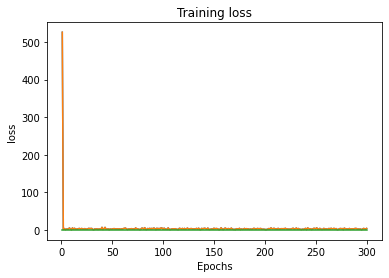

In [16]:
loss = history.history['loss']
mse = history.history['mse']
accuracy = history.history['accuracy']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label = 'Training loss')
plt.plot(epochs, mse, label = 'Training mse')
plt.plot(epochs, accuracy, label = 'Accuracy')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')

plt.show()

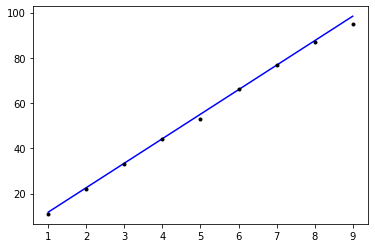

In [17]:
plt. plot(X, model.predict(X), 'b', X, y, 'k.')

### 이진 분류 모델 - Tensorflow with keras

In [18]:
X = np.array([-50, -40, -30, -20, -10, -5, 0,
              5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0,
              1, 1, 1, 1, 1, 1])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,  random_state=42
)

In [20]:
print(f'X_train : {X_train}\tX_test : {X_test}\n')
print(f'y_train : {y_train}\ty_test : {y_test}\n')

X_train : [ 10  -5 -30 -40  50 -10   5  30 -20   0]	X_test : [ 40  20 -50]

y_train : [1 0 0 0 1 0 1 1 0 0]	y_test : [1 1 0]



### 1. 모델링

In [35]:
model = Sequential()
model.add(Dense(1, input_dim =1, activation='sigmoid'))
#model.add(Dense(1, activation='relu'))

### 2. 컴파일

In [36]:
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy',
              metrics = ['binary_accuracy'])

### 3. 훈련

In [37]:
history = model.fit(X_train, y_train, batch_size =1,
                    epochs=300, validation_split = 0.2)

Epoch 1/300
8/8 [==============================] - 0s 19ms/step - loss: 0.3047 - binary_accuracy: 0.8750 - val_loss: 0.3486 - val_binary_accuracy: 1.0000
Epoch 2/300
8/8 [==============================] - 0s 6ms/step - loss: 0.0807 - binary_accuracy: 1.0000 - val_loss: 0.3465 - val_binary_accuracy: 1.0000
Epoch 3/300
8/8 [==============================] - 0s 5ms/step - loss: 0.0667 - binary_accuracy: 1.0000 - val_loss: 0.3457 - val_binary_accuracy: 1.0000
Epoch 4/300
8/8 [==============================] - 0s 4ms/step - loss: 0.0571 - binary_accuracy: 1.0000 - val_loss: 0.3453 - val_binary_accuracy: 1.0000
Epoch 5/300
8/8 [==============================] - 0s 4ms/step - loss: 0.0501 - binary_accuracy: 1.0000 - val_loss: 0.3450 - val_binary_accuracy: 1.0000
Epoch 6/300
8/8 [==============================] - 0s 5ms/step - loss: 0.0448 - binary_accuracy: 1.0000 - val_loss: 0.3449 - val_binary_accuracy: 1.0000
Epoch 7/300
8/8 [==============================] - 0s 4ms/step - loss: 0.0405 - b

### 4. 평가

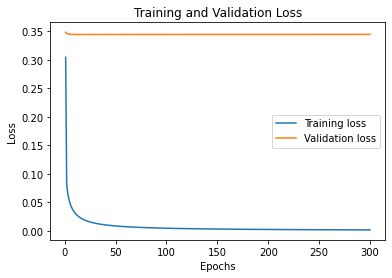

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, label = 'Training loss')
plt.plot(epochs, val_loss, label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 5. 예측

In [39]:
model.predict(X_test)

array([[1.0000000e+00],
       [1.0000000e+00],
       [1.0933111e-22]], dtype=float32)

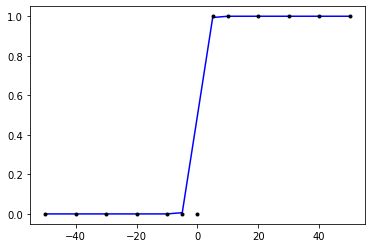

In [40]:
plt.plot(X, model.predict(X), 'b', X, y, 'k.')